In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests
import shutil
import bs4
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
import pyautogui
import cv2
import time

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_11868\1819639429.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


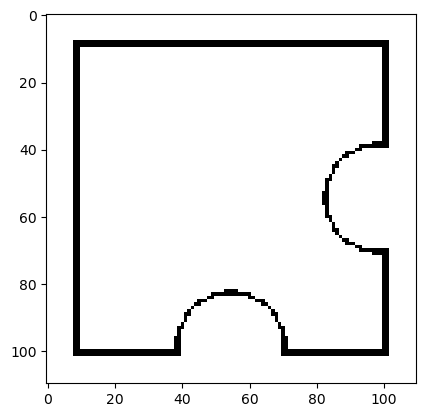

In [12]:
PATH = "C:\chromedriver_win32\chromedriver.exe"
driver = webdriver.Chrome(PATH)



#url that you want to scrape
link = 'https://www.tiktok.com/@dogcat_0327/video/7207585274312871211'

#open and maximize window
driver.get(link)
driver.maximize_window()

time.sleep(6) #nanti diganti tunggunya sampai captha nya nge load

#CAPTCHA SOLVER
#download image function
def down(image, xpath):
    #ambil link image
    captcha = driver.find_element (By.XPATH, xpath)
    src = captcha.get_attribute('src')

    #download image
    response = requests.get(src, stream=True)
    with open(image, 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

#download captcha image
down('captcha_img.jpeg', "//*[@id='captcha-verify-image']")
#download piece of captcha image
down('captcha_piece.jpeg', "//*[@id='tiktok-verify-ele']/div/div[2]/img[2]")

time.sleep(2)

#read img
img = cv2.imread('captcha_img.jpeg')
img_piece = cv2.imread('captcha_piece.jpeg')

#CONTOURS FUNCTION
def bin_img(image):
    img = cv2.imread(image)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_img = cv2.threshold(img_gray, 242, 255, cv2.THRESH_BINARY_INV)[1]
    plt.imshow(binary_img, cmap='gray')

    return binary_img

capt = bin_img('captcha_img.jpeg')
piece = bin_img('captcha_piece.jpeg')

#matching shape
match = cv2.matchTemplate(capt, piece, cv2.TM_CCOEFF_NORMED)

#check x, y in maximum value
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

#width and height
w = piece.shape[1]
h = piece.shape[0]

#drag slider with mouse movement
time.sleep(2)

#gerakin mouse ke slider button
pyautogui.moveTo(782, 722, duration=1.5)

#drag mouse ke puzzle pece yang benar
pyautogui.dragRel((0.78*max_loc[0]), 0, button='left', duration=2)

time.sleep(5)

#exit login bar
ext = driver.find_element(By.XPATH, '//*[@id="login-modal"]/div[2]')
ext.click()

time.sleep(2)

#open profile
profile = driver.find_element(By.XPATH, '//*[@id="main-content-video_detail"]/div/div[2]/div[1]/div[2]/div/a[2]/span[1]')
profile.click()

time.sleep(2)

# coret2an

In [20]:
#untuk membersihkan link yg di profile sebelum disamakan dengan link yg kita punya
c = 'https://www.tiktok.com/@dndalstri._/video/7233570284572249370?is_from_webapp=1&sender_device=pc&web_id=7205425525594031618'
c[:c.find('?')]

'https://www.tiktok.com/@dndalstri._/video/7233570284572249370'

In [10]:
time.sleep(5)

#exit login bar
ext = driver.find_element(By.XPATH, '//*[@id="login-modal"]/div[2]')
ext.click()

time.sleep(2)

#open profile
element = driver.find_element(By.XPATH, //*[@id="main-content-video_detail"]/div/div[2]/div[1]/div[2]/div/a[2]/span[1])
element.click()

time.sleep(2)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="login-modal"]/div[2]"}
  (Session info: chrome=113.0.5672.127)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00308893+48451]
	(No symbol) [0x0029B8A1]
	(No symbol) [0x001A5058]
	(No symbol) [0x001D0467]
	(No symbol) [0x001D069B]
	(No symbol) [0x001FDD92]
	(No symbol) [0x001EA304]
	(No symbol) [0x001FC482]
	(No symbol) [0x001EA0B6]
	(No symbol) [0x001C7E08]
	(No symbol) [0x001C8F2D]
	GetHandleVerifier [0x00568E3A+2540266]
	GetHandleVerifier [0x005A8959+2801161]
	GetHandleVerifier [0x005A295C+2776588]
	GetHandleVerifier [0x00392280+612144]
	(No symbol) [0x002A4F6C]
	(No symbol) [0x002A11D8]
	(No symbol) [0x002A12BB]
	(No symbol) [0x00294857]
	BaseThreadInitThunk [0x750F6BA9+25]
	RtlGetFullPathName_UEx [0x77318F9F+1215]
	RtlGetFullPathName_UEx [0x77318F6D+1165]
	(No symbol) [0x00000000]
